In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import random
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn.metrics import classification_report

In [74]:
weather_df = pd.read_csv("./seattle-weather.csv")
weather_df.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [75]:
weather_df.tail()

,date,precipitation,temp_max,temp_min,wind,weather
1456,2015-12-27,8.6,4.4,1.7,2.9,rain
1457,2015-12-28,1.5,5.0,1.7,1.3,rain
1458,2015-12-29,0.0,7.2,0.6,2.6,fog
1459,2015-12-30,0.0,5.6,-1.0,3.4,sun
1460,2015-12-31,0.0,5.6,-2.1,3.5,sun


In [76]:
# Convert Date object to date time object
weather_df["date"] = pd.to_datetime(weather_df["date"])

In [77]:
# Adding month and year column 
weather_df["month"] = weather_df["date"].dt.month
weather_df["year"] = weather_df["date"].dt.year

In [78]:
weather_df["weather"].unique()

array(['drizzle', 'rain', 'sun', 'snow', 'fog'], dtype=object)

In [79]:
weather_df.drop(columns=["date","year"],inplace=True)

In [80]:
# Trends in the weather
monthly_weather = weather_df.groupby("month",as_index=False)["weather"].value_counts(sort=True,normalize=True)
monthly_weather[monthly_weather["proportion"] > 0.5][["month","weather"]]

,month,weather
5,2,rain
10,3,rain
15,4,rain
20,5,sun
24,6,sun
28,7,sun
32,8,sun
36,9,sun
44,11,rain
49,12,rain


C:\Users\ASUS\AppData\Local\Temp\ipykernel_5340\3269858339.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor=weather_df.corr()


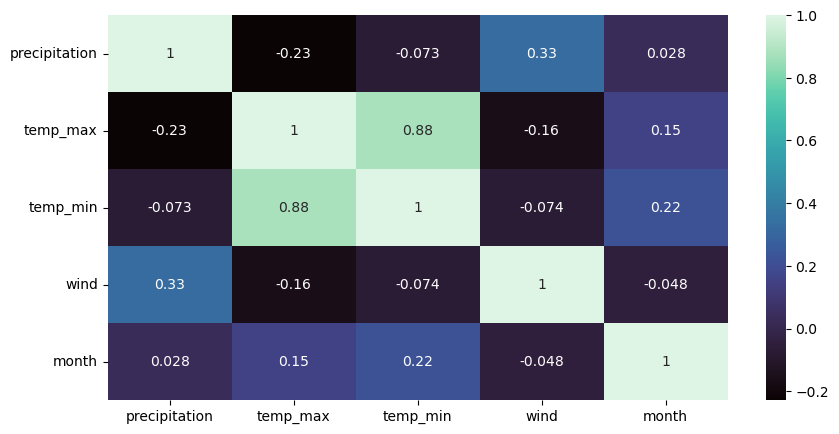

In [81]:
cor=weather_df.corr()
plt.figure(figsize=(10,5))
sns.heatmap(cor,annot=True,cmap='mako')
plt.show()

In [86]:
weather_df = weather_df.sample(frac = 1, random_state=9) #shuffling data
target = weather_df['weather'].copy() # target column separated
weather_df = weather_df.drop(['weather'], axis=1) #deleting target column from data
X_train, X_test, y_train, y_test = train_test_split(weather_df, target, test_size=0.2,  random_state=7)

In [87]:
weather_df.head()

,precipitation,temp_max,temp_min,wind,month
96,0.3,11.1,3.3,2.6,4
994,0.0,26.1,12.8,3.0,9
1346,0.0,22.8,13.3,2.4,9
991,0.3,19.4,15.0,3.1,9
720,5.6,8.9,5.6,2.3,12


In [88]:
clf_gini = tree.DecisionTreeClassifier(criterion='gini')
clf_gini = clf_gini.fit(X_train, y_train)
gini_predict = clf_gini.predict(X_test)

In [91]:
print(classification_report(y_test, gini_predict, zero_division=1))

              precision    recall  f1-score   support

     drizzle       0.00      0.00      0.00        15
         fog       0.06      0.05      0.05        21
        rain       0.48      0.45      0.47       132
        snow       0.00      0.00      0.00         4
         sun       0.43      0.48      0.45       121

    accuracy                           0.41       293
   macro avg       0.19      0.20      0.19       293
weighted avg       0.40      0.41      0.40       293



In [93]:
extremely_rts = ExtraTreesClassifier(n_estimators=50, criterion='gini',
                                     max_depth=50,
                                     min_samples_split=2)
extremely_rts = extremely_rts.fit(X_train, np.ravel(y_train)) #training
extreme_predict = extremely_rts.predict(X_test)

In [94]:
print(classification_report(y_test, extreme_predict, zero_division=1))

              precision    recall  f1-score   support

     drizzle       0.00      0.00      0.00        15
         fog       0.20      0.05      0.08        21
        rain       0.49      0.52      0.50       132
        snow       0.00      0.00      0.00         4
         sun       0.42      0.51      0.46       121

    accuracy                           0.45       293
   macro avg       0.22      0.22      0.21       293
weighted avg       0.41      0.45      0.42       293



In [95]:
clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=None),
    n_estimators=100)
booster = clf.fit(X_train, np.ravel(y_train))
booster_predict = booster.predict(X_test)

In [96]:
print(classification_report(y_test, booster_predict, zero_division=1))

              precision    recall  f1-score   support

     drizzle       0.00      0.00      0.00        15
         fog       0.05      0.05      0.05        21
        rain       0.44      0.39      0.42       132
        snow       0.00      0.00      0.00         4
         sun       0.38      0.45      0.41       121

    accuracy                           0.37       293
   macro avg       0.17      0.18      0.18       293
weighted avg       0.36      0.37      0.36       293



In [97]:
index= 1
X = X_test[index-1 : index]
position = np.where(extremely_rts.predict_proba(X)[0] == max(extremely_rts.predict_proba(X)[0]))
print(extremely_rts.predict_proba(X)[0])
extremely_rts. classes_

[0.1  0.   0.82 0.   0.08]


array(['drizzle', 'fog', 'rain', 'snow', 'sun'], dtype=object)

In [98]:
print(extremely_rts. classes_[position])
extremely_rts.predict_proba(X)[0][position]


['rain']


array([0.82])

# Observations
- We have data from 2012-01-01 to 2015-12-31 (4 years)

- We have 5 different weather conditions `drizzle, rain, sun, snow, fog`

- `Feb, March, April, November, December` have a high change of `rain`

- `May, June, July, August, Sept` have a high chance of `sun`